In [1]:
import numpy as np

# MSE
# 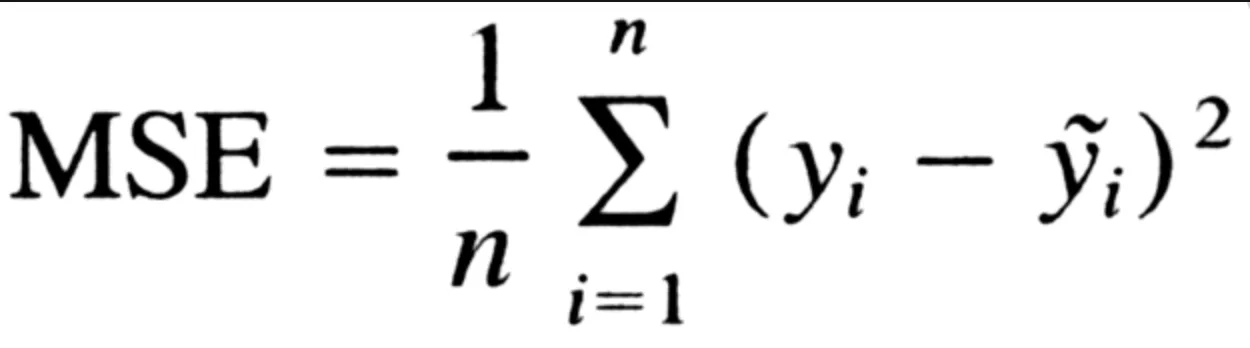

In [32]:
y = np.array([16, 21, 27, 19, 22, 42])
y_pred = np.array([16, 21, 26, 19, 22, 41])

def mean_squared_error(act, pred):
    diff = act - pred
    diff_squared = diff * diff
    mse = diff_squared.mean()
    return mse

print(f'Mean squared error: {mean_squared_error(y, y_pred)}')

Mean squared error: 0.3333333333333333


# MAE
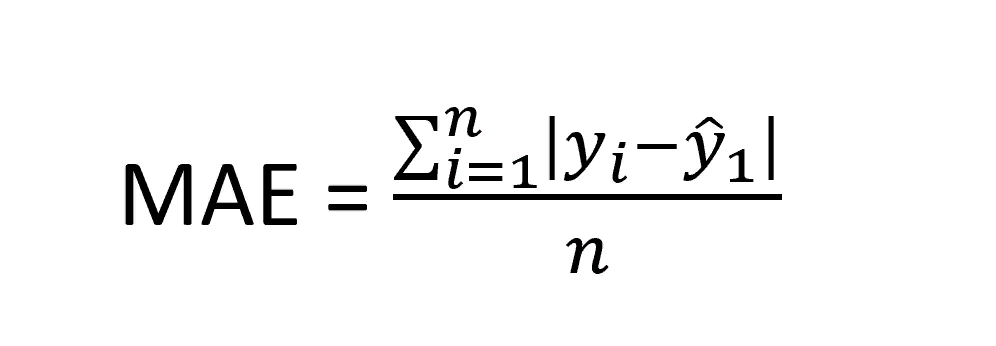

In [33]:
y = np.array([1.1, 2, 1.7])
y_pred = np.array([1, 1.7, 1.5])

def mean_absolute_error(act, pred):
    diff_abs = abs(act - pred)
    mae = diff_abs.mean()
    return mae

print(f'Mean squared error: {mean_absolute_error(y, y_pred)}')

Mean squared error: 0.20000000000000004


# Cross-entropy loss
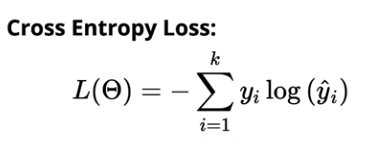

In [34]:
y = np.array([0, 1, 0, 0])
y_pred = np.array([0.05, 0.85, 0.10, 0])

def cross_entropy_loss(act, pred):
    epsilon = 1e-15
    pred = np.clip(pred, epsilon, 1 - epsilon)  # для избежания log(0) или log(1) функция clip ставит ограничения
    cel = -np.sum(act*np.log(pred))
    return cel

print(cross_entropy_loss(y, y_pred))

0.16251892949777494


# f1-score
<li>TP - фактический класс объекта 1 (True) и прогнозируемый также 1 (True).</li>
<li>TN - фактический класс объекта 0 (False) и прогнозируемый также 0 (False).</li>
<li>FP - фактический класс объекта 0 (False), а прогнозируемый - 1 (True).</li>
<li>FN - фактический класс объекта 1 (True), а прогнозируемый - 0 (False).</li>

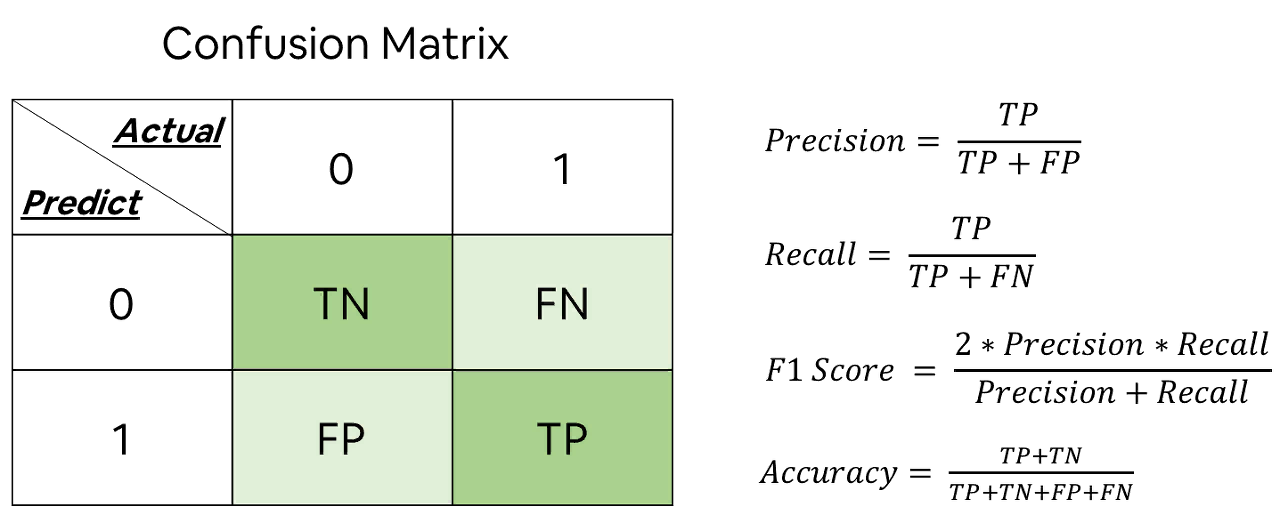

In [50]:
y = np.array(     [0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1])
y_pred = np.array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

confusion_matrix = np.array([[4, 1], [3, 4]])
confusion_matrix

array([[4, 1],
       [3, 4]])

In [51]:
TP = confusion_matrix[1][1] # 4
TN = confusion_matrix[0][0] # 4
FN = confusion_matrix[1][0] # 3
FP = confusion_matrix[0][1] # 1

precision = TP/(TP + FP)
recall = TP/(TP + FN)
f1_score = 2*recall*precision/(precision + recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'f1-score: {f1_score}')

Precision: 0.8
Recall: 0.5714285714285714
f1-score: 0.6666666666666666


#### Проверка матрицы с помощью sklearn

In [49]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[4, 1],
       [3, 4]], dtype=int64)

# Linear regression with Grad 

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

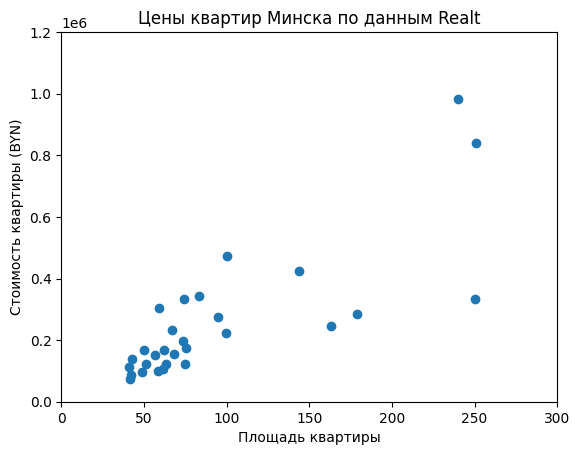

In [127]:
X = np.array([42.9, 68.2, 74.1, 73.5, 94.8, 163, 63.2, 48.7, 61.4, 75.5, 61.9, 58.2, 75, 41.2, 179, 83.3, 99.6, 144, 56.4, 59.1, 250, 251, 
              42.1, 240, 50, 51, 100, 67, 41.3])
y = np.array([137591, 155504, 332660, 196840, 275576, 246050, 121057, 95271, 107278, 173022, 168298, 98223, 122041, 112337, 285418, 344470, 222429, 423206, 
              152551, 305102, 332660, 840507, 86177, 984200, 167117, 122041, 472416, 234240, 74799])

plt.scatter(x=X, y=y)

plt.xlabel("Площадь квартиры")
plt.ylabel("Стоимость квартиры (BYN)")
plt.title("Цены квартир Минска по данным Realt")
plt.xlim(0, 300)
plt.ylim(0, 1200000)

plt.show()

### $w_0 = 0, w_1 = 0$
### $w_0 = w_0 - \alpha \frac{\partial J}{\partial w_0}$
### $w_1 = w_1 - \alpha \frac{\partial J}{\partial w_1}$
#### где J - функция стоимости (MSE)
### $ \frac{1}{n}\sum_{i=1}^{n}\left( y_{i}-y_{predi} \right)^{2} $

In [162]:
def linear_regression(X, y, learning_rate=0.01, num_iterations=1000):
    w0, w1 = 0, 0
    n = len(X)
    
    for _ in range(num_iterations):
        y_pred = w0 + w1 * X

        dw0 = (-2/n) * np.sum(y - y_pred) # производная MSE по w0
        dw1 = (-2/n) * np.sum((y - y_pred)*X) # производная MSE по w1

        w0 = w0 - learning_rate * dw0
        w1 = w1 - learning_rate * dw1

    return w0, w1

w0, w1 = linear_regression(X, y, learning_rate=0.00001, num_iterations=10000)

print(f"w0: {w0:.4f}, w1: {w1:.4f}")
y_pred = w0 + w1 * X
print(f'Предсказанные значения цен:\n{y_pred}')

w0: 396.1551, w1: 2697.4673
Предсказанные значения цен:
[116117.50202255 184363.42455544 200278.4815888  198660.00121253
 256116.05457026 440083.32400676 170876.08808649 131762.81232653
 166020.64695767 204054.93580011 167369.38060456 157388.75161754
 202706.20215322 111531.80762311 483242.8007074  225095.18069167
 269063.89758046 388831.44542474 152533.31048872 159816.47218195
 674762.97856651 677460.4458603  113959.52818752 647788.3056286
 135269.51980846 137966.98710225 270142.88449797 181126.46380289
 111801.55435249]


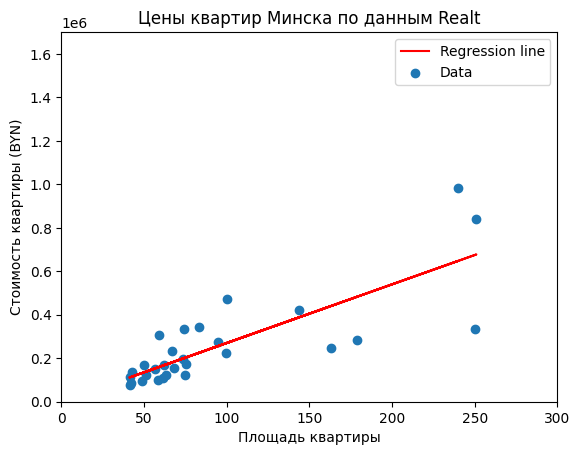

In [159]:
plt.plot(X, y_pred, color='red', label='Regression line')
plt.scatter(X, y, label='Data')

plt.xlabel("Площадь квартиры")
plt.ylabel("Стоимость квартиры (BYN)")
plt.title("Цены квартир Минска по данным Realt")
plt.xlim(0, 300)
plt.ylim(0, 1700000)
plt.legend()

plt.show()

# Проверка с помощью LinearRegression из модуля sklearn.linear_model

[120194.00742122 187316.55622503 202969.64072869 201377.80162662
 257888.08974999 438827.13435158 174051.23037448 135581.78540787
 169275.71306828 206683.93196685 170602.24565333 160785.90452392
 205357.39938179 115683.79663203 481276.17707336 227377.84029371
 270622.80256653 388418.89611946 156010.38721772 163173.66317702
 669643.80415125 672296.86932136 118071.55528513 643113.15245014
 139030.77012901 141683.83529912 271684.02863457 184132.8780209
 115949.10314904]


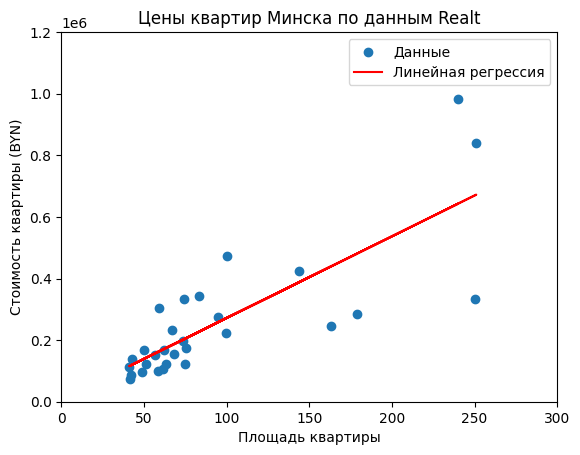

In [160]:
from sklearn.linear_model import LinearRegression

X_resh = X.reshape(-1, 1)

lr = LinearRegression()
lr.fit(X_resh,y)
y_pred = lr.predict(X_resh)

print(y_pred)

plt.scatter(X, y, label='Данные')
plt.plot(X, y_pred, color='red', label='Линейная регрессия')

plt.xlabel("Площадь квартиры")
plt.ylabel("Стоимость квартиры (BYN)")
plt.title("Цены квартир Минска по данным Realt")
plt.xlim(0, 300)
plt.ylim(0, 1200000)
plt.legend()

plt.show()